# Preliminares

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#Estatística Descritiva

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IS/Dataframes/CLASSIFICATION_DATA.csv',
                 sep = ',')
df.head(5)

,VAR_0,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,...,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,Target
0,-0.252851,0.303744,-0.251467,-0.345476,1.051370,0.084735,-1.120051,0.212190,1.128456,1.652177,...,-1.094160,-0.725720,-0.284066,-1.099955,-1.337883,0.866107,1.391478,0.299998,-1.427750,0
1,-1.260323,0.888270,1.395680,-0.415328,-0.112950,-0.551871,1.216609,-0.794750,-0.944225,-0.013426,...,0.639838,-0.499192,-0.686646,-0.370534,0.417959,-0.259205,-0.380366,2.851188,-1.005918,1
2,0.732527,0.182199,-0.674875,0.790469,-0.140526,-1.199873,0.017096,1.326455,0.381272,0.262963,...,-2.070491,0.177257,1.537373,-0.958356,2.359733,-1.093574,-1.226909,0.459132,-0.515472,1
3,-0.585251,-0.063286,0.585887,-1.565182,1.357573,1.338898,-0.428958,0.913192,2.971963,-0.358268,...,1.376216,0.181984,-1.512928,-1.088205,-0.443074,-1.316975,-1.585387,-0.896042,0.332659,0
4,-0.611630,0.793862,-0.028032,-0.574877,0.706458,0.197539,-1.092781,1.596296,0.375392,-0.445291,...,-1.605299,1.010495,-0.681575,1.125076,-0.588117,0.198212,-0.801422,0.736017,0.404574,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VAR_0   10000 non-null  float64
 1   VAR_1   10000 non-null  float64
 2   VAR_2   10000 non-null  float64
 3   VAR_3   10000 non-null  float64
 4   VAR_4   10000 non-null  float64
 5   VAR_5   10000 non-null  float64
 6   VAR_6   10000 non-null  float64
 7   VAR_7   10000 non-null  float64
 8   VAR_8   10000 non-null  float64
 9   VAR_9   10000 non-null  float64
 10  VAR_10  10000 non-null  float64
 11  VAR_11  10000 non-null  float64
 12  VAR_12  10000 non-null  float64
 13  VAR_13  10000 non-null  float64
 14  VAR_14  10000 non-null  float64
 15  VAR_15  10000 non-null  float64
 16  VAR_16  10000 non-null  float64
 17  VAR_17  10000 non-null  float64
 18  VAR_18  10000 non-null  float64
 19  VAR_19  10000 non-null  float64
 20  Target  10000 non-null  int64  
dtypes: float64(20), int64(1)
memory usag

In [ ]:
df.describe()

,VAR_0,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,...,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.186855,-0.002045,-0.007909,-0.001657,0.015417,0.220350,0.003034,-0.003825,0.010729,-0.004005,...,-0.009836,0.004462,-0.001896,-0.015145,-0.006617,0.009159,-0.010996,-0.615511,-0.012498,0.204300
std,0.847992,1.002239,0.997162,1.007485,1.005404,1.083678,1.001745,1.003055,0.995520,0.994226,...,1.002879,0.996281,1.432104,0.990764,0.999271,0.998161,1.002691,1.123408,0.988079,0.403209
min,-2.793123,-3.596511,-5.002837,-4.161452,-3.688975,-3.659182,-3.572579,-4.070440,-4.063125,-3.643834,...,-3.887383,-4.067483,-5.235831,-3.931497,-4.271885,-3.790453,-3.753775,-4.709611,-3.672908,0.000000
25%,-0.387396,-0.675519,-0.672798,-0.679870,-0.667538,-0.568446,-0.671500,-0.682478,-0.652901,-0.671863,...,-0.669793,-0.664209,-1.064785,-0.693433,-0.673303,-0.671203,-0.695031,-1.322738,-0.666266,0.000000
50%,0.064415,-0.014302,-0.005901,-0.001642,0.020637,0.189325,-0.003407,-0.007688,0.007201,-0.005456,...,-0.007284,0.003861,-0.114119,-0.015338,-0.016945,0.001726,-0.011242,-0.822401,-0.003938,0.000000
75%,0.798953,0.677061,0.665341,0.690786,0.704259,0.976717,0.682143,0.665345,0.676318,0.655999,...,0.661906,0.678210,1.057260,0.647630,0.672311,0.696287,0.666565,-0.014295,0.652281,0.000000
max,3.048964,3.833914,3.463224,3.496862,4.036835,4.002674,4.303838,4.041328,4.545715,4.108575,...,3.772331,3.912987,4.621245,3.670074,4.092602,3.996215,3.718123,3.784335,3.455180,1.000000


In [ ]:
df.columns

Index(['VAR_0', 'VAR_1', 'VAR_2', 'VAR_3', 'VAR_4', 'VAR_5', 'VAR_6', 'VAR_7',
       'VAR_8', 'VAR_9', 'VAR_10', 'VAR_11', 'VAR_12', 'VAR_13', 'VAR_14',
       'VAR_15', 'VAR_16', 'VAR_17', 'VAR_18', 'VAR_19', 'Target'],
      dtype='object')

In [ ]:
df['Target'].value_counts()


Target
0    7957
1    2043
Name: count, dtype: int64

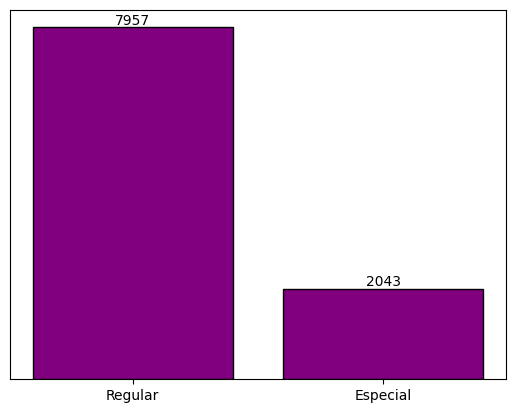

In [ ]:
plt.bar(['Regular', 'Especial'],
        df['Target'].value_counts().values,
        color = 'purple',
        edgecolor = 'black')

for i,val in enumerate(df['Target'].value_counts().values):
    plt.annotate(str(val),
                 xy=(i,val),
                 ha='center',
                 va='bottom')

plt.yticks([])

plt.show()

#Tratamento de Dados

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state = 42)

---

In [ ]:
ros = RandomOverSampler()

In [ ]:
rus = RandomUnderSampler()

In [ ]:
x_over, y_over = ros.fit_resample(x,y)

In [ ]:
x_under, y_under = rus.fit_resample(x,y)

In [ ]:
x_over_train, x_over_test, y_over_train, y_over_test = train_test_split(x_over, y_over,test_size = 0.2, random_state = 42)

In [ ]:
x_under_train, x_under_test, y_under_train, y_under_test = train_test_split(x_under, y_under,test_size = 0.2, random_state = 42)

In [ ]:
y_under.value_counts()

Target
0    2043
1    2043
Name: count, dtype: int64

In [ ]:
y_over.value_counts()

Target
0    7957
1    7957
Name: count, dtype: int64

---

#Modelos de SAM

In [ ]:
arvore = tree.DecisionTreeClassifier()
arvore.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = arvore.predict(x_test)

In [ ]:
np.round(f1_score(y_test,y_pred), 2)

0.82

In [ ]:
np.round(precision_score(y_test,y_pred), 2)

0.82

In [ ]:
np.round(recall_score(y_test,y_pred), 2)

0.81

---

In [ ]:
arvore_oversampled = tree.DecisionTreeClassifier()
arvore_oversampled.fit(x_over_train, y_over_train)

DecisionTreeClassifier()

In [ ]:
y_over_pred = arvore_oversampled.predict(x_over_test)

In [ ]:
np.round(f1_score(y_over_test,y_over_pred), 2)

0.98

In [ ]:
np.round(precision_score(y_over_test,y_over_pred), 2)

0.96

In [ ]:
np.round(recall_score(y_over_test,y_over_pred), 2)

0.99

---

In [ ]:
arvore_undersampled = tree.DecisionTreeClassifier()
arvore_undersampled.fit(x_under_train, y_under_train)

DecisionTreeClassifier()

In [ ]:
y_under_pred = arvore_undersampled.predict(x_under_test)

In [ ]:
np.round(f1_score(y_under_test,y_under_pred), 2)

0.9

In [ ]:
np.round(precision_score(y_under_test,y_under_pred), 2)

0.9

In [ ]:
np.round(recall_score(y_under_test,y_under_pred), 2)

0.9

##Gráficos

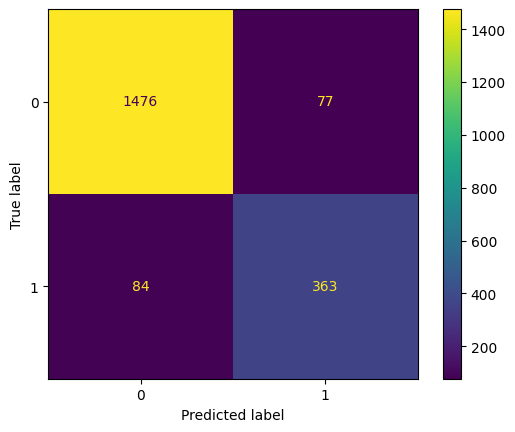

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()

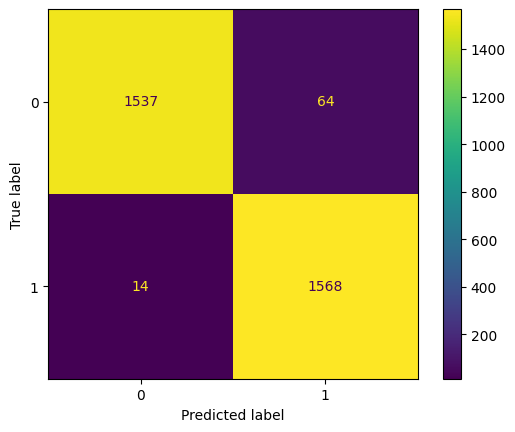

In [ ]:
disp_over = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_over_test,y_over_pred))
disp_over.plot()
plt.show()

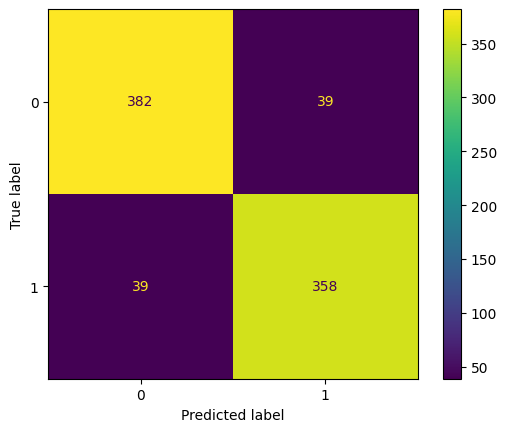

In [ ]:
disp_under = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_under_test,y_under_pred))
disp_under.plot()
plt.show()